# Complex Networks
#### Igor F. Nascimento

# 1. Context
##### "Você deve escolher ao menos quatro redes disponíveis nos repositórios abaixo ou em outros repositórios (e não apenas as redes disponíveis no graph-tool), e caracterizá-las utilizando diferentes métricas, como grau, distância, tamanho das componentes conexas, e outras (você pode escolher outras). Para cada métrica analisada, calcule as seguintes estatísticas: máximo, mínimo, média, mediana, desvio padrão, e distribuição empírica (faça um gráfico). "

### 1.1 imports

In [121]:
from IPython.display import Math , Latex
from IPython.display import clear_output
import networkx as nx
from nxpd import draw
import pandas as pd
import termtables as tt
import numpy as np
from operator import itemgetter
import matplotlib.pyplot as plt
import powerlaw

### 1.2 Datasets

##### [`Collaboration network of Arxiv High Energy Physics Theory`](http://snap.stanford.edu/data/ca-HepTh.html)

##### [`Collaboration network of Arxiv High Energy Physics Theory`](http://snap.stanford.edu/data/ca-HepTh.html)


### 1.3 Defines
##### Paths, and global variables

In [123]:
pathColab = './FirstWork/datasets/ca-HepTh.txt'
colColab = ['FromNodeID','ToNodeID']

pathP2p = './FirstWork/datasets/p2p-Gnutella31.txt'
colP2p = ['FromNodeID','ToNodeID']

adjnoun = './FirstWork/datasets/adjnoun.gml'


### 1.4 Aux functions

In [215]:
def distanceMesureList(g, sampleSize=None):
    if(sampleSize != None):
        n_nodes = sampleSize
    else:
        n_nodes = g.number_of_nodes()    
        
    df_statsLocal = pd.DataFrame(nx.degree(g))
    df_statsLocal.columns = ['Node', 'Degree']
    
    distances = list()
    dist = []
    for source_node in np.random.choice(df_statsLocal['Node'].unique(), size=n_nodes):
        dist.append(nx.shortest_path_length(g,source_node))

    nodeListDist = np.array([])
    for n in range(n_nodes):
        target_node = list(dist[n].keys())[0]
        nodeListDist = np.append(nodeListDist, np.array(list(dist[n].values())[1:]))
        
    return nodeListDist

In [115]:
#print nodes sorted by eigenvector centrality in decending order
def print_nodes_by_eigenvector_cent (g, x=all): #input g=graph; x=number of nodes
    eigenvector_centrality_dict = nx.eigenvector_centrality(g)  # eigenvactor centrality for each node
    sorted_eigenvector = sorted(eigenvector_centrality_dict.items(), key=itemgetter(1), reverse=True) #sort in reverse
    print("Nodes sorted by eigenvector centrality:")
    if x==all:
        for b in sorted_eigenvector[:]: #print all nodes with eigenvector centrality
            print(b) 
    else:
        for b in sorted_eigenvector[:x]: #print top x nodes with eigenvector centrality
            print(b)

In [116]:
#print nodes sorted by page rank centrality in decending order
def print_nodes_by_page_rank_cent (g, x=all): #input g=graph; x=number of nodes
    page_rank_centrality_dict = nx.pagerank(g) # page rank centrality for each node
    sorted_page_rank = sorted(page_rank_centrality_dict.items(), key=itemgetter(1), reverse=True) #sort in reverse
    print("Nodes sorted by page rank centrality:")
    if x==all:
        for b in sorted_page_rank[:]: #print all nodes with page rank centrality
            print(b) 
    else:
        for b in sorted_page_rank[:x]: #print top x nodes with page rank centrality
            print(b)


In [117]:
#print nodes sorted by closeness centrality in decending order
def print_nodes_by_closeness_cent (g, x=all): #input g=graph; x=number of nodes
    closeness_centrality_dict = nx.closeness_centrality(g) # closeness centrality for each node
    sorted_closeness = sorted(closeness_centrality_dict.items(), key=itemgetter(1), reverse=True) #sort in reverse
    print("Nodes sorted by closeness centrality:")
    if x==all:
        for b in sorted_closeness[:]: #print all nodes with closeness centrality
            print(b) 
    else:
        for b in sorted_closeness[:x]: #print top x nodes with closeness centrality
            print(b)


In [118]:
#print nodes sorted by betweenness centrality in decending order
def print_nodes_by_betweenness_cent (g, x=all): #input g=graph; x=number of nodes
    betweenness_centrality_dict = nx.betweenness_centrality(g) # calculate betweenness centrality for each node
    sorted_betweenness = sorted(betweenness_centrality_dict.items(), key=itemgetter(1), reverse=True) #sort in reverse
    print("Nodes sorted by betweenness centrality:")
    if x==all:
        for b in sorted_betweenness[:]: #print all nodes with betweenness centrality
            print(b) 
    else:
        for b in sorted_betweenness[:x]: #print top x nodes with betweenness centrality
            print(b) 


In [119]:
#print nodes sorted by degree centrality in decending order
def print_nodes_by_degree_cent (g, x=all):
    degree_centrality_dict = nx.degree_centrality(g) # calculate degree centrality for each node
    sorted_degree = sorted(degree_centrality_dict.items(), key=itemgetter(1), reverse=True) #sort in reverse
    print("Nodes sorted by degree centrality:")
    if x==all:
        for b in sorted_degree[:]: #print all nodes with degree centrality
            print(b) 
    else:
        for b in sorted_degree[:x]: #print top x nodes with degree centrality
            print(b) 


In [214]:
# draw node proportion to the degree of the node
def draw_node_size_by_deg (g, scale=None, with_labels=True, hight = 6, widith = 4): 
    plt.rcParams["figure.figsize"] = (hight,widith)
    degree = nx.degree(g) # degree centrality
    node_list = [n for (n,m) in degree]
    degree_list = [int(m) for (n, m) in degree]  
    if scale==None:
        nx.draw_kamada_kawai(g, with_labels=with_labels,nodelist=node_list,node_size=[n*70 for n in degree_list])
    else:        
        nx.draw_kamada_kawai(g, with_labels=with_labels,nodelist=node_list,node_size=[n*scale for n in degree_list])
    plt.show()
    plt.close()

In [85]:
# print network/graph info    
def print_graph_info(g):
    print (nx.info(g))
    print ("Network diameter = ", nx.diameter(g))
    print ("Network average clustering coefficient = ", nx.average_clustering(g))
    print ("Network density = ", nx.density(g))
    print ("Network average shortest path length= ",nx.average_shortest_path_length(g))


In [3]:
## Defining a function for plotting the CCDF that will be largely used in this work
def empiricalCCDF(typo, dataset, data) : 
    x,y = powerlaw.ccdf(data)
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
    ax.set_title("Empirical {} CCDF".format(typo))
    ax.plot(x, y)
    ax.set_xscale("log"), ax.set_yscale("log")
    ax.set_xlabel("x"), ax.set_ylabel("Fraction of Samples >= x")
    ax.grid(True)
    plt.savefig("./images/{}_empirical_ccdf_{}.png".format(dataset,typo), bbox_inches="tight")

In [4]:
## Defining a table ploting function
def createTableData(paramOldData, decimals, paramNewData, newDataName, isSampled):
    oldData = paramOldData.copy()
    newData = paramNewData.copy()
    newProcessedData = [newDataName, 
                        np.around(np.max(newData), decimals=decimals),
                        np.around(np.min(newData), decimals=decimals),
                        np.around(np.mean(newData), decimals=decimals),
                        np.around(np.median(newData), decimals=decimals),
                        np.around(np.std(newData), decimals=decimals),
                        isSampled]
    
    newData = oldData.copy()
    newData.append(newProcessedData)
    
    ## Since this method is destructive we must copy the data
    returnData = newData.copy()
    
    print(tt.to_string(newData, header=[ "Metric" , "Max", "Min", "Average", "Median", "Standard Deviation", "Sampled"]))
    return returnData, oldData

## 2. Collaboration network
#### 2.1 Definition:
##### Arxiv HEP-TH (High Energy Physics - Theory) collaboration network is from the e-print arXiv and covers scientific collaborations between authors papers submitted to High Energy Physics - Theory category. If an author i co-authored a paper with author j, the graph contains a undirected edge from i to j. If the paper is co-authored by k authors this generates a completely connected (sub)graph on k nodes.

##### The data covers papers in the period from January 1993 to April 2003 (124 months). It begins within a few months of the inception of the arXiv, and thus represents essentially the complete history of its HEP-TH section.

#### 2.2 Import and Characterizing the Dataset

In [5]:
df = pd.read_csv(pathColab, sep='\t', names=colColab)
G = nx.Graph()
tuples = [tuple(x) for x in df.values]
G.add_edges_from(tuples)
edges = G.edges

In [6]:
data = [["Paper Description", "Undirected", 9877, 25998],
        ["NetworkX","Undirected",  G.number_of_nodes(), G.number_of_edges()]]
print(tt.to_string(data, header=[ "Provider", "Type", "Nodes", "Edges"]))

┌───────────────────┬────────────┬───────┬───────┐
│ Provider          │ Type       │ Nodes │ Edges │
╞═══════════════════╪════════════╪═══════╪═══════╡
│ Paper Description │ Undirected │ 9877  │ 25998 │
├───────────────────┼────────────┼───────┼───────┤
│ NetworkX          │ Undirected │ 9877  │ 25998 │
└───────────────────┴────────────┴───────┴───────┘


In [7]:
print("Example of the data and Dataset descriptions \n")
print( df[0:5],'\n\n', df.describe())

Example of the data and Dataset descriptions 

   FromNodeID  ToNodeID
0       24325     24394
1       24325     40517
2       24325     58507
3       24394      3737
4       24394      3905 

          FromNodeID      ToNodeID
count  51971.000000  51971.000000
mean   34294.387389  34294.387389
std    19865.210725  19865.210725
min        1.000000      1.000000
25%    16854.000000  16854.000000
50%    34402.000000  34402.000000
75%    51315.000000  51315.000000
max    68745.000000  68745.000000


#### 2.3 Extracting Metrics
#### - Degree

In [8]:
df_stats = pd.DataFrame(nx.degree(G))
df_stats.columns = ['Node', 'Degree']

In [33]:
data = []
data, dataUltilHere1 = createTableData(data, 5, df_stats['Degree'],"Degree", "No")

┌────────┬─────┬─────┬─────────┬────────┬────────────────────┬─────────┐
│ Metric │ Max │ Min │ Average │ Median │ Standard Deviation │ Sampled │
╞════════╪═════╪═════╪═════════╪════════╪════════════════════╪═════════╡
│ Degree │ 65  │ 1   │ 5.26435 │ 3.0    │ 6.19128            │ No      │
└────────┴─────┴─────┴─────────┴────────┴────────────────────┴─────────┘


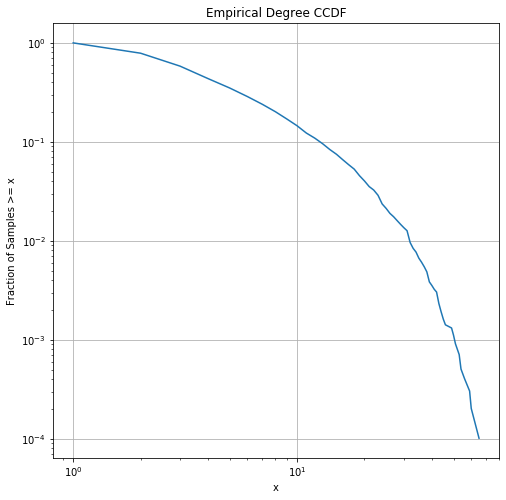

In [10]:
empiricalCCDF("Degree", "ColabData", df_stats['Degree'])

#### - Distance

##### For the porpouse of reducing computational complexity <br> we can use [Chebyshev's inequality](https://en.wikipedia.org/wiki/Chebyshev%27s_inequality), defined as :
$$
\begin{equation*}
\mathsf{P}[|\overline{X} - \mu| < \delta] > 1 - \varepsilon \qquad (1)
\end{equation*}
$$

##### And therefore assuming normal distribution (_only really strongly non-normal distributions will have any impact_). <br> We want to be 99% confident that the sample mean is within 1% of the population mean'. <br> i.e. Find n such that :
$$
\begin{equation*}
\mathsf{P}[|\overline{X} - \mu| < 0.01\mu] = 0.99 \qquad (2)
\end{equation*}
$$

##### Also 99% of a normal distribution is within 2.576 s.d.'s of the population mean (from the normal table) thus:
$$
\begin{equation*}
2.576 \times \frac{\mu}{\sqrt{n}}  =  0.99 \qquad (3)
\end{equation*}
$$

## Refazer as contas ... Precisa melhorar ... Não levar ao relatório

In [11]:
%time
n_nodes = 500
distances = list()
dist = []
for source_node in np.random.choice(df_stats['Node'].unique(), size=n_nodes):
    dist.append(nx.shortest_path_length(G,source_node))
    
nodeListDist = []
for n in range(n_nodes):
    target_node = list(dist[n].keys())[0]
    nodeListDist = np.append(nodeListDist, np.array(list(dist[n].values())[1:]))

CPU times: user 8 µs, sys: 0 ns, total: 8 µs
Wall time: 15.7 µs


In [34]:
data, dataUltilHere2 = createTableData(data, 5, nodeListDist,"Distance", "Yes - 500")

┌──────────┬──────┬─────┬─────────┬────────┬────────────────────┬───────────┐
│ Metric   │ Max  │ Min │ Average │ Median │ Standard Deviation │ Sampled   │
╞══════════╪══════╪═════╪═════════╪════════╪════════════════════╪═══════════╡
│ Degree   │ 65   │ 1   │ 5.26435 │ 3.0    │ 6.19128            │ No        │
├──────────┼──────┼─────┼─────────┼────────┼────────────────────┼───────────┤
│ Distance │ 17.0 │ 1.0 │ 5.88602 │ 6.0    │ 1.50268            │ Yes - 500 │
└──────────┴──────┴─────┴─────────┴────────┴────────────────────┴───────────┘


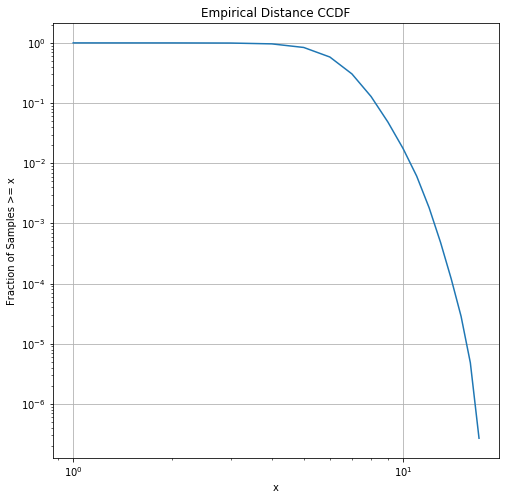

In [14]:
empiricalCCDF("Distance", "ColabData", nodeListDist)

### - Degree Centrality

In [15]:
degree_centrality =  np.around(np.array(list(nx.degree_centrality(G).values())), decimals=6)

In [35]:
data, dataUltilHere3 = createTableData(data, 5, degree_centrality,"Degree Centrality", "No")

┌───────────────────┬─────────┬────────┬─────────┬────────┬────────────────────┬───────────┐
│ Metric            │ Max     │ Min    │ Average │ Median │ Standard Deviation │ Sampled   │
╞═══════════════════╪═════════╪════════╪═════════╪════════╪════════════════════╪═══════════╡
│ Degree            │ 65      │ 1      │ 5.26435 │ 3.0    │ 6.19128            │ No        │
├───────────────────┼─────────┼────────┼─────────┼────────┼────────────────────┼───────────┤
│ Distance          │ 17.0    │ 1.0    │ 5.88602 │ 6.0    │ 1.50268            │ Yes - 500 │
├───────────────────┼─────────┼────────┼─────────┼────────┼────────────────────┼───────────┤
│ Degree Centrality │ 0.00658 │ 0.0001 │ 0.00053 │ 0.0003 │ 0.00063            │ No        │
└───────────────────┴─────────┴────────┴─────────┴────────┴────────────────────┴───────────┘


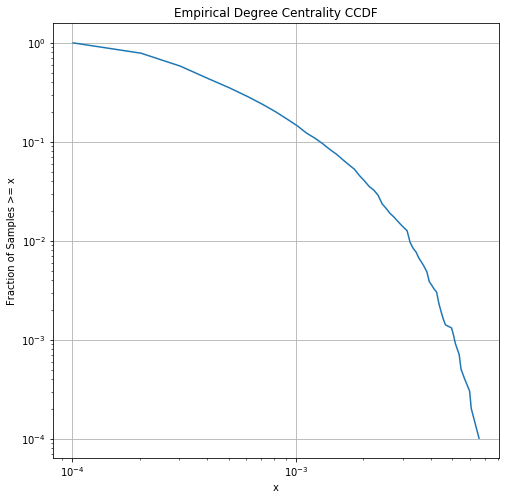

In [18]:
empiricalCCDF("Degree Centrality", "ColabData", degree_centrality)

### - Closeness Centrality

In [19]:
%time
n_nodes = 500
close_cent = list()
for source_node in np.random.choice(df_stats['Node'].unique(), size=n_nodes):
    close_cent.append(nx.closeness_centrality(G,source_node))

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.58 µs


In [36]:
data, dataUltilHere4 = createTableData(data, 5, close_cent,"Closeness Centrality", "Yes - 500")

┌──────────────────────┬─────────┬────────┬─────────┬─────────┬────────────────────┬───────────┐
│ Metric               │ Max     │ Min    │ Average │ Median  │ Standard Deviation │ Sampled   │
╞══════════════════════╪═════════╪════════╪═════════╪═════════╪════════════════════╪═══════════╡
│ Degree               │ 65      │ 1      │ 5.26435 │ 3.0     │ 6.19128            │ No        │
├──────────────────────┼─────────┼────────┼─────────┼─────────┼────────────────────┼───────────┤
│ Distance             │ 17.0    │ 1.0    │ 5.88602 │ 6.0     │ 1.50268            │ Yes - 500 │
├──────────────────────┼─────────┼────────┼─────────┼─────────┼────────────────────┼───────────┤
│ Degree Centrality    │ 0.00658 │ 0.0001 │ 0.00053 │ 0.0003  │ 0.00063            │ No        │
├──────────────────────┼─────────┼────────┼─────────┼─────────┼────────────────────┼───────────┤
│ Closeness Centrality │ 0.21088 │ 0.0001 │ 0.13497 │ 0.14794 │ 0.05131            │ Yes - 500 │
└──────────────────────┴──────

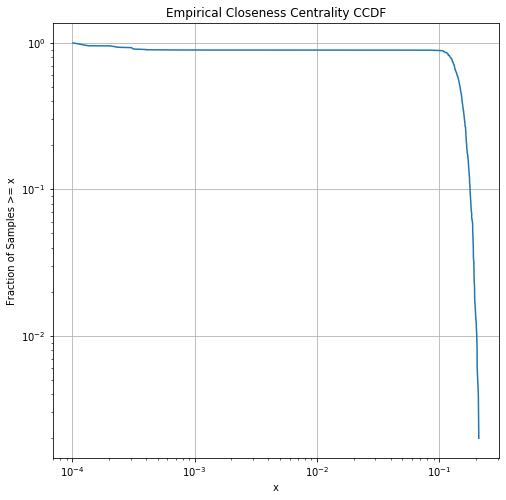

In [21]:
empiricalCCDF("Closeness Centrality", "ColabData", close_cent)

### - Triangle Clustering

In [22]:
%%time
n_nodes = 9877
triangles = list()
for source_node in np.random.choice(df_stats['Node'].unique(), size=n_nodes):
    triangles.append(nx.triangles(G,source_node))
triangles = np.around(np.array(triangles), decimals=5)

CPU times: user 718 ms, sys: 0 ns, total: 718 ms
Wall time: 717 ms


In [37]:
data, dataUltilHere5 = createTableData(data[:-1], 5, triangles,"Triangle Clustering", "No")

┌─────────────────────┬─────────┬────────┬─────────┬────────┬────────────────────┬───────────┐
│ Metric              │ Max     │ Min    │ Average │ Median │ Standard Deviation │ Sampled   │
╞═════════════════════╪═════════╪════════╪═════════╪════════╪════════════════════╪═══════════╡
│ Degree              │ 65      │ 1      │ 5.26435 │ 3.0    │ 6.19128            │ No        │
├─────────────────────┼─────────┼────────┼─────────┼────────┼────────────────────┼───────────┤
│ Distance            │ 17.0    │ 1.0    │ 5.88602 │ 6.0    │ 1.50268            │ Yes - 500 │
├─────────────────────┼─────────┼────────┼─────────┼────────┼────────────────────┼───────────┤
│ Degree Centrality   │ 0.00658 │ 0.0001 │ 0.00053 │ 0.0003 │ 0.00063            │ No        │
├─────────────────────┼─────────┼────────┼─────────┼────────┼────────────────────┼───────────┤
│ Triangle Clustering │ 505     │ 0      │ 8.53893 │ 2.0    │ 32.50668           │ No        │
└─────────────────────┴─────────┴────────┴────────

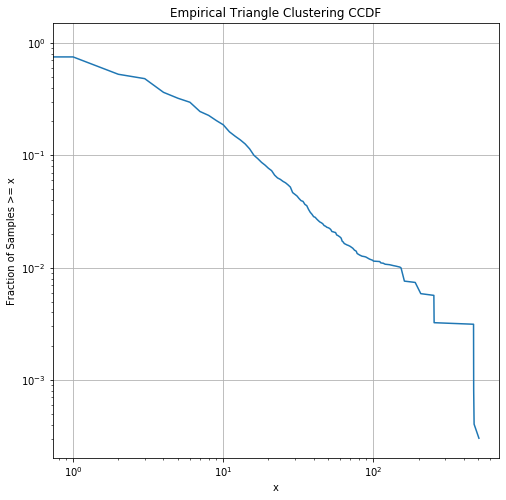

In [25]:
empiricalCCDF("Triangle Clustering", "ColabData", triangles)

### - Clustering Coefficient

In [26]:
%time
n_nodes = 9877
clustering = list()
for source_node in np.random.choice(df_stats['Node'].unique(), size=n_nodes):
    clustering.append(nx.clustering(G,source_node))

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.3 µs


In [38]:
data, dataUltilHere6 = createTableData(data, 5, clustering,"Clustering Coefficient", "No")

┌────────────────────────┬─────────┬────────┬─────────┬─────────┬────────────────────┬───────────┐
│ Metric                 │ Max     │ Min    │ Average │ Median  │ Standard Deviation │ Sampled   │
╞════════════════════════╪═════════╪════════╪═════════╪═════════╪════════════════════╪═══════════╡
│ Degree                 │ 65      │ 1      │ 5.26435 │ 3.0     │ 6.19128            │ No        │
├────────────────────────┼─────────┼────────┼─────────┼─────────┼────────────────────┼───────────┤
│ Distance               │ 17.0    │ 1.0    │ 5.88602 │ 6.0     │ 1.50268            │ Yes - 500 │
├────────────────────────┼─────────┼────────┼─────────┼─────────┼────────────────────┼───────────┤
│ Degree Centrality      │ 0.00658 │ 0.0001 │ 0.00053 │ 0.0003  │ 0.00063            │ No        │
├────────────────────────┼─────────┼────────┼─────────┼─────────┼────────────────────┼───────────┤
│ Triangle Clustering    │ 505     │ 0      │ 8.53893 │ 2.0     │ 32.50668           │ No        │
├─────────

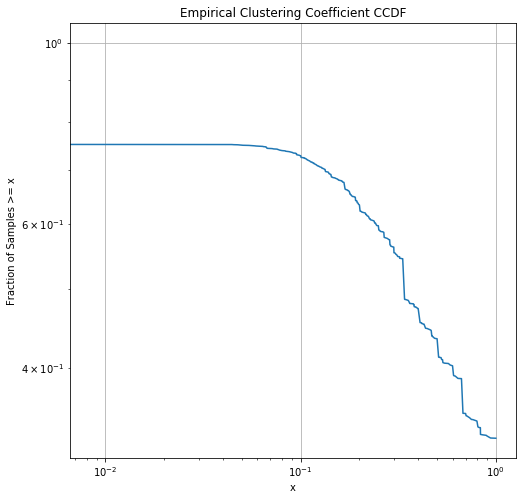

In [28]:
empiricalCCDF("Clustering Coefficient", "ColabData", clustering)

### - Eigenvector Centrality

In [31]:
%time
n_nodes = 500
eigenvector_centrality = nx.eigenvector_centrality(G)
eigenvector_centrality = np.array(list(eigenvector_centrality.values()))

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs


In [41]:
data, dataUltilHere7 = createTableData(data, 5, eigenvector_centrality,"Eigenvector Centrality", "Yes - 500")

┌────────────────────────┬─────────┬────────┬─────────┬─────────┬────────────────────┬───────────┐
│ Metric                 │ Max     │ Min    │ Average │ Median  │ Standard Deviation │ Sampled   │
╞════════════════════════╪═════════╪════════╪═════════╪═════════╪════════════════════╪═══════════╡
│ Degree                 │ 65      │ 1      │ 5.26435 │ 3.0     │ 6.19128            │ No        │
├────────────────────────┼─────────┼────────┼─────────┼─────────┼────────────────────┼───────────┤
│ Distance               │ 17.0    │ 1.0    │ 5.88602 │ 6.0     │ 1.50268            │ Yes - 500 │
├────────────────────────┼─────────┼────────┼─────────┼─────────┼────────────────────┼───────────┤
│ Degree Centrality      │ 0.00658 │ 0.0001 │ 0.00053 │ 0.0003  │ 0.00063            │ No        │
├────────────────────────┼─────────┼────────┼─────────┼─────────┼────────────────────┼───────────┤
│ Triangle Clustering    │ 505     │ 0      │ 8.53893 │ 2.0     │ 32.50668           │ No        │
├─────────

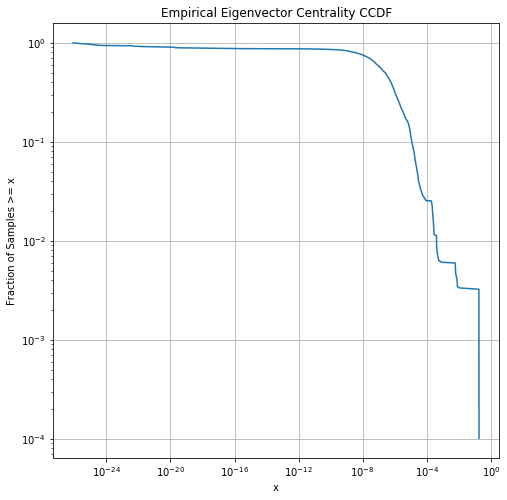

In [40]:
empiricalCCDF("Eigenvector Centrality", "ColabData", eigenvector_centrality)

## 3. Gnutella peer-to-peer network, August 31 2002
#### 3.1 Definition:
##### The Gnutella peer-to-peer file sharing network from August 31 2002. Nodes represent hosts in the Gnutella network topology and edges represent connections between the Gnutella hosts.

##### Directed graph (each unordered pair of nodes is saved once)

#### 3.2 Import and Characterizing the Dataset

In [42]:
df = pd.read_csv(pathP2p, sep='\t', names=colP2p)
G2 = nx.DiGraph()
tuples = [tuple(x) for x in df.values]
G2.add_edges_from(tuples)
edges = G.edges

In [44]:
data = [["Paper Description", "Directed", 62586, 147892],
        ["NetworkX","Directed",  G2.number_of_nodes(), G2.number_of_edges()]]
print(tt.to_string(data, header=[ "Provider", "Type", "Nodes", "Edges"]))

┌───────────────────┬──────────┬───────┬────────┐
│ Provider          │ Type     │ Nodes │ Edges  │
╞═══════════════════╪══════════╪═══════╪════════╡
│ Paper Description │ Directed │ 62586 │ 147892 │
├───────────────────┼──────────┼───────┼────────┤
│ NetworkX          │ Directed │ 62586 │ 147892 │
└───────────────────┴──────────┴───────┴────────┘


In [45]:
print("Example of the data and Dataset descriptions \n")
print( df[0:5],'\n\n', df.describe())

Example of the data and Dataset descriptions 

   FromNodeID  ToNodeID
0           0         1
1           0         2
2           0         3
3           0         4
4           0         5 

           FromNodeID       ToNodeID
count  147892.000000  147892.000000
mean    32509.421605   26256.051822
std     18810.427405   17800.595562
min         0.000000       0.000000
25%     16197.000000   10458.000000
50%     33501.000000   24504.000000
75%     49321.250000   40711.000000
max     62580.000000   62585.000000


#### 3.3 Extracting Metrics
#### - Degree

In [46]:
df_stats = pd.DataFrame(nx.degree(G2))
df_stats.columns = ['Node', 'Degree']

In [48]:
dataP2P = []
dataP2P, dataP2PUltilHere = createTableData(dataP2P, 5, df_stats['Degree'],"Degree", "No")

┌────────┬─────┬─────┬─────────┬────────┬────────────────────┬─────────┐
│ Metric │ Max │ Min │ Average │ Median │ Standard Deviation │ Sampled │
╞════════╪═════╪═════╪═════════╪════════╪════════════════════╪═════════╡
│ Degree │ 95  │ 1   │ 4.72604 │ 2.0    │ 5.70116            │ No      │
└────────┴─────┴─────┴─────────┴────────┴────────────────────┴─────────┘


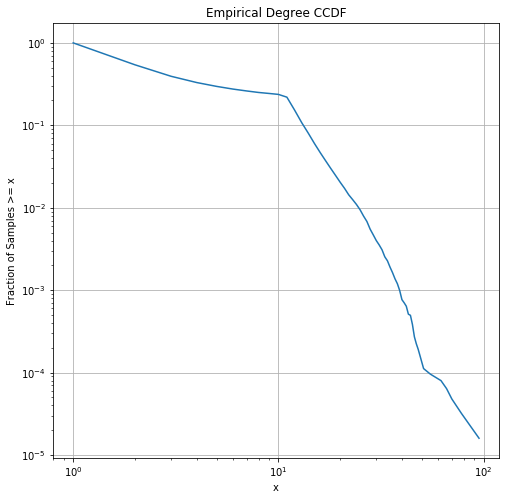

In [49]:
empiricalCCDF("Degree", "p2pLartData", df_stats['Degree'])

### - Distance; In and Out

In [50]:
%%time
n_nodes = 500
distances = list()
dist = []
for source_node in np.random.choice(df_stats['Node'].unique(), size=n_nodes):
    dist.append(nx.shortest_path_length(G2,source_node))

CPU times: user 47.5 s, sys: 83.7 ms, total: 47.5 s
Wall time: 47.6 s


In [51]:
nodeListDist = np.array([])
for n in range(n_nodes):
    target_node = list(dist[n].keys())[0]
    nodeListDist = np.append(nodeListDist, np.array(list(dist[n].values())[1:]))

In [65]:
dataP2P, dataP2PUltilHere = createTableData(dataP2P, 5, nodeListDist,"Distance Out", "Yes - 500")

┌──────────────┬──────┬─────┬─────────┬────────┬────────────────────┬───────────┐
│ Metric       │ Max  │ Min │ Average │ Median │ Standard Deviation │ Sampled   │
╞══════════════╪══════╪═════╪═════════╪════════╪════════════════════╪═══════════╡
│ Degree       │ 95   │ 1   │ 4.72604 │ 2.0    │ 5.70116            │ No        │
├──────────────┼──────┼─────┼─────────┼────────┼────────────────────┼───────────┤
│ Distance Out │ 24.0 │ 1.0 │ 9.28498 │ 9.0    │ 2.38194            │ Yes - 500 │
└──────────────┴──────┴─────┴─────────┴────────┴────────────────────┴───────────┘


#### In order to calculate the in distance, wu must reverse all the graph. Thats why G2.reverse

In [54]:
%%time
n_nodes = 500
distances = list()
dist = []
for source_node in np.random.choice(df_stats['Node'].unique(), size=n_nodes):
    dist.append(nx.shortest_path_length(G2.reverse(copy=False) ,source_node))

CPU times: user 1min 5s, sys: 196 ms, total: 1min 5s
Wall time: 1min 5s


In [55]:
nodeListDist = np.array([])
for n in range(n_nodes):
    target_node = list(dist[n].keys())[0]
    nodeListDist = np.append(nodeListDist, np.array(list(dist[n].values())[1:]))

In [67]:
dataP2P, dataP2PUltilHere = createTableData(dataP2P, 5, nodeListDist,"Distance - In", "Yes - 400")

┌───────────────┬──────┬─────┬─────────┬────────┬────────────────────┬───────────┐
│ Metric        │ Max  │ Min │ Average │ Median │ Standard Deviation │ Sampled   │
╞═══════════════╪══════╪═════╪═════════╪════════╪════════════════════╪═══════════╡
│ Degree        │ 95   │ 1   │ 4.72604 │ 2.0    │ 5.70116            │ No        │
├───────────────┼──────┼─────┼─────────┼────────┼────────────────────┼───────────┤
│ Distance Out  │ 24.0 │ 1.0 │ 9.28498 │ 9.0    │ 2.38194            │ Yes - 500 │
├───────────────┼──────┼─────┼─────────┼────────┼────────────────────┼───────────┤
│ Distance - In │ 24.0 │ 1.0 │ 9.28498 │ 9.0    │ 2.38194            │ Yes - 400 │
└───────────────┴──────┴─────┴─────────┴────────┴────────────────────┴───────────┘


In [60]:
degree_centrality_In =  np.around(np.array(list(nx.in_degree_centrality(G2).values())), decimals=6)

In [68]:
dataP2P, dataP2PUltilHere3 = createTableData(dataP2P, 5, degree_centrality_In,"In Degree Centrality", "No")

┌──────────────────────┬─────────┬─────┬─────────┬────────┬────────────────────┬───────────┐
│ Metric               │ Max     │ Min │ Average │ Median │ Standard Deviation │ Sampled   │
╞══════════════════════╪═════════╪═════╪═════════╪════════╪════════════════════╪═══════════╡
│ Degree               │ 95      │ 1   │ 4.72604 │ 2.0    │ 5.70116            │ No        │
├──────────────────────┼─────────┼─────┼─────────┼────────┼────────────────────┼───────────┤
│ Distance Out         │ 24.0    │ 1.0 │ 9.28498 │ 9.0    │ 2.38194            │ Yes - 500 │
├──────────────────────┼─────────┼─────┼─────────┼────────┼────────────────────┼───────────┤
│ Distance - In        │ 24.0    │ 1.0 │ 9.28498 │ 9.0    │ 2.38194            │ Yes - 400 │
├──────────────────────┼─────────┼─────┼─────────┼────────┼────────────────────┼───────────┤
│ In Degree Centrality │ 0.00109 │ 0.0 │ 4e-05   │ 2e-05  │ 4e-05              │ No        │
└──────────────────────┴─────────┴─────┴─────────┴────────┴───────────

In [63]:
degree_centrality_Out =  np.around(np.array(list(nx.out_degree_centrality(G2).values())), decimals=6)

In [69]:
dataP2P, dataP2PUltilHere4 = createTableData(dataP2P, 5, degree_centrality_Out,"Out Degree Centrality", "No")

┌───────────────────────┬─────────┬─────┬─────────┬────────┬────────────────────┬───────────┐
│ Metric                │ Max     │ Min │ Average │ Median │ Standard Deviation │ Sampled   │
╞═══════════════════════╪═════════╪═════╪═════════╪════════╪════════════════════╪═══════════╡
│ Degree                │ 95      │ 1   │ 4.72604 │ 2.0    │ 5.70116            │ No        │
├───────────────────────┼─────────┼─────┼─────────┼────────┼────────────────────┼───────────┤
│ Distance Out          │ 24.0    │ 1.0 │ 9.28498 │ 9.0    │ 2.38194            │ Yes - 500 │
├───────────────────────┼─────────┼─────┼─────────┼────────┼────────────────────┼───────────┤
│ Distance - In         │ 24.0    │ 1.0 │ 9.28498 │ 9.0    │ 2.38194            │ Yes - 400 │
├───────────────────────┼─────────┼─────┼─────────┼────────┼────────────────────┼───────────┤
│ In Degree Centrality  │ 0.00109 │ 0.0 │ 4e-05   │ 2e-05  │ 4e-05              │ No        │
├───────────────────────┼─────────┼─────┼─────────┼────────┼

talvez adicionar mais uma ou duas metricas

## 4. Zachary's karate club
#### 4.1 Definition:
##### These are data collected from the members of a university karate club by Wayne Zachary. The ZACHE matrix represents the presence or absence of ties among the members of the club; the ZACHC matrix indicates the relative strength of the associations (number of situations in and outside the club in which interactions occurred). 

##### Directed graph (each unordered pair of nodes is saved once)

#### 4.2 Import and Characterizing the Dataset

In [89]:
G3 = nx.karate_club_graph()
data = [["NetworkX","Undirected",  G3.number_of_nodes(), G3.number_of_edges(), nx.diameter(G3), nx.density(G3)]]
print(tt.to_string(data, header=[ "Provider", "Type", "Nodes", "Edges", "Diameter", "Density"]))

┌──────────┬────────────┬───────┬───────┬──────────┬─────────────────────┐
│ Provider │ Type       │ Nodes │ Edges │ Diameter │ Density             │
╞══════════╪════════════╪═══════╪═══════╪══════════╪═════════════════════╡
│ NetworkX │ Undirected │ 34    │ 78    │ 5        │ 0.13903743315508021 │
└──────────┴────────────┴───────┴───────┴──────────┴─────────────────────┘


In [90]:
df_stats = pd.DataFrame(nx.degree(G3))
df_stats.columns = ['Node', 'Degree']

In [91]:
dataKarate = []
dataKarate, dataKarateUltilHere1 = createTableData(dataKarate, 5, df_stats['Degree'],"Degree", "No")

┌────────┬─────┬─────┬─────────┬────────┬────────────────────┬─────────┐
│ Metric │ Max │ Min │ Average │ Median │ Standard Deviation │ Sampled │
╞════════╪═════╪═════╪═════════╪════════╪════════════════════╪═════════╡
│ Degree │ 17  │ 1   │ 4.58824 │ 3.0    │ 3.82036            │ No      │
└────────┴─────┴─────┴─────────┴────────┴────────────────────┴─────────┘


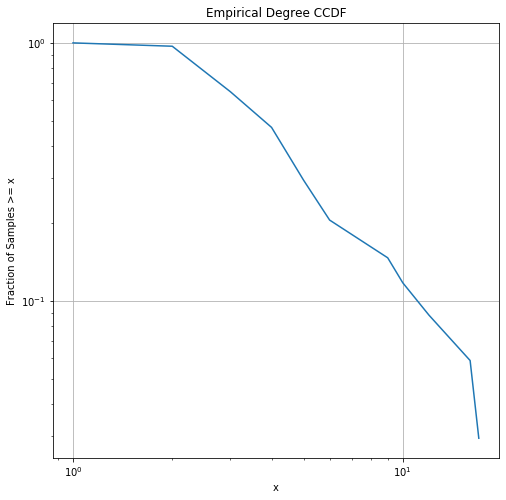

In [92]:
empiricalCCDF("Degree", "karateData", df_stats['Degree'])

In [93]:
%%time
n_nodes = 33
distances = list()
dist = []
for source_node in np.random.choice(df_stats['Node'].unique(), size=n_nodes):
    dist.append(nx.shortest_path_length(G3,source_node))
    
nodeListDist = np.array([])
for n in range(n_nodes):
    target_node = list(dist[n].keys())[0]
    nodeListDist = np.append(nodeListDist, np.array(list(dist[n].values())[1:]))

CPU times: user 172 ms, sys: 0 ns, total: 172 ms
Wall time: 168 ms


In [94]:
dataKarate, dataKarateUltilHere2 = createTableData(dataKarate, 5, nodeListDist,"Distance", "No")

┌──────────┬─────┬─────┬─────────┬────────┬────────────────────┬─────────┐
│ Metric   │ Max │ Min │ Average │ Median │ Standard Deviation │ Sampled │
╞══════════╪═════╪═════╪═════════╪════════╪════════════════════╪═════════╡
│ Degree   │ 17  │ 1   │ 4.58824 │ 3.0    │ 3.82036            │ No      │
├──────────┼─────┼─────┼─────────┼────────┼────────────────────┼─────────┤
│ Distance │ 5.0 │ 1.0 │ 2.36915 │ 2.0    │ 0.90077            │ No      │
└──────────┴─────┴─────┴─────────┴────────┴────────────────────┴─────────┘


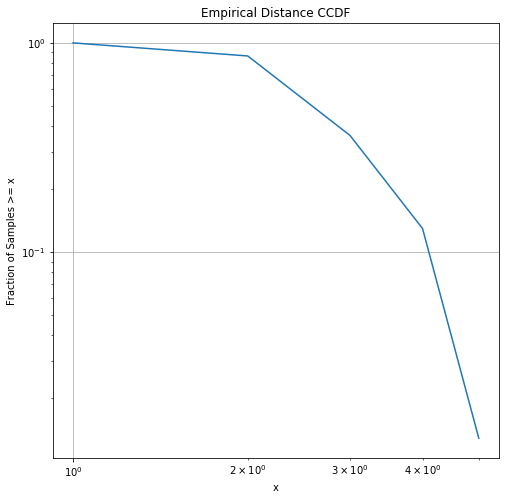

In [95]:
empiricalCCDF("Distance", "karateData",nodeListDist)

In [96]:
degree_centrality_karate =  np.around(np.array(list(nx.degree_centrality(G3).values())), decimals=6)

In [97]:
dataKarate, dataKarateUltilHere3 = createTableData(dataKarate, 5, degree_centrality_karate,"Degree Centrality", "No")

┌───────────────────┬─────────┬────────┬─────────┬─────────┬────────────────────┬─────────┐
│ Metric            │ Max     │ Min    │ Average │ Median  │ Standard Deviation │ Sampled │
╞═══════════════════╪═════════╪════════╪═════════╪═════════╪════════════════════╪═════════╡
│ Degree            │ 17      │ 1      │ 4.58824 │ 3.0     │ 3.82036            │ No      │
├───────────────────┼─────────┼────────┼─────────┼─────────┼────────────────────┼─────────┤
│ Distance          │ 5.0     │ 1.0    │ 2.36915 │ 2.0     │ 0.90077            │ No      │
├───────────────────┼─────────┼────────┼─────────┼─────────┼────────────────────┼─────────┤
│ Degree Centrality │ 0.51515 │ 0.0303 │ 0.13904 │ 0.09091 │ 0.11577            │ No      │
└───────────────────┴─────────┴────────┴─────────┴─────────┴────────────────────┴─────────┘


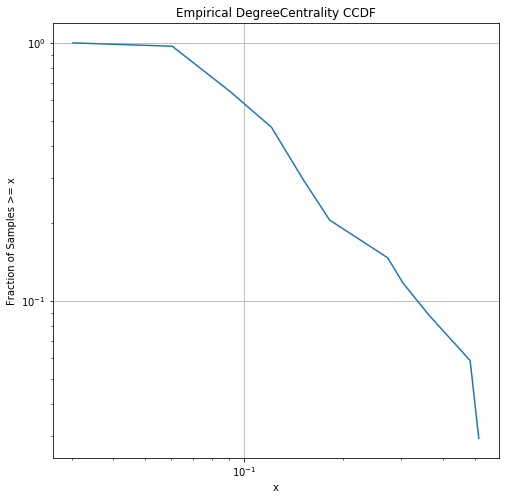

In [98]:
empiricalCCDF("DegreeCentrality", "karateData",degree_centrality_karate)

In [105]:
bet_cent = list(nx.betweenness_centrality(G3).values())

In [106]:
dataKarate, dataKarateUltilHere4 = createTableData(dataKarate, 5, bet_cent,"Betweenness Centrality", "No")

┌────────────────────────┬─────────┬────────┬─────────┬─────────┬────────────────────┬─────────┐
│ Metric                 │ Max     │ Min    │ Average │ Median  │ Standard Deviation │ Sampled │
╞════════════════════════╪═════════╪════════╪═════════╪═════════╪════════════════════╪═════════╡
│ Degree                 │ 17      │ 1      │ 4.58824 │ 3.0     │ 3.82036            │ No      │
├────────────────────────┼─────────┼────────┼─────────┼─────────┼────────────────────┼─────────┤
│ Distance               │ 5.0     │ 1.0    │ 2.36915 │ 2.0     │ 0.90077            │ No      │
├────────────────────────┼─────────┼────────┼─────────┼─────────┼────────────────────┼─────────┤
│ Degree Centrality      │ 0.51515 │ 0.0303 │ 0.13904 │ 0.09091 │ 0.11577            │ No      │
├────────────────────────┼─────────┼────────┼─────────┼─────────┼────────────────────┼─────────┤
│ Betweenness Centrality │ 0.43764 │ 0.0    │ 0.04401 │ 0.00257 │ 0.09254            │ No      │
└────────────────────────┴────

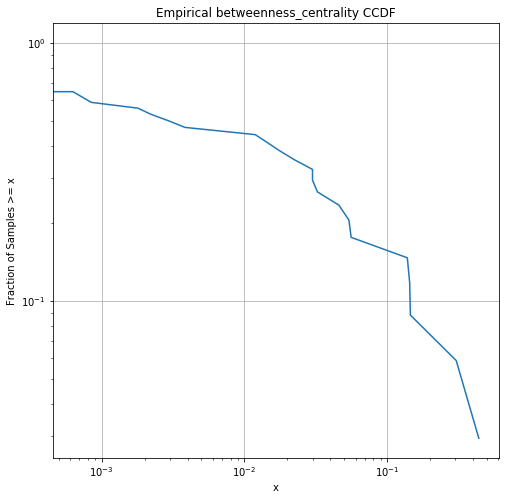

In [107]:
empiricalCCDF("betweenness_centrality", "karateData",bet_cent)

In [108]:
close_cent = list(nx.closeness_centrality(G3).values())

In [109]:
dataKarate, dataKarateUltilHere5 = createTableData(dataKarate, 5, close_cent,"Closeness Centrality", "No")

┌────────────────────────┬─────────┬─────────┬─────────┬─────────┬────────────────────┬─────────┐
│ Metric                 │ Max     │ Min     │ Average │ Median  │ Standard Deviation │ Sampled │
╞════════════════════════╪═════════╪═════════╪═════════╪═════════╪════════════════════╪═════════╡
│ Degree                 │ 17      │ 1       │ 4.58824 │ 3.0     │ 3.82036            │ No      │
├────────────────────────┼─────────┼─────────┼─────────┼─────────┼────────────────────┼─────────┤
│ Distance               │ 5.0     │ 1.0     │ 2.36915 │ 2.0     │ 0.90077            │ No      │
├────────────────────────┼─────────┼─────────┼─────────┼─────────┼────────────────────┼─────────┤
│ Degree Centrality      │ 0.51515 │ 0.0303  │ 0.13904 │ 0.09091 │ 0.11577            │ No      │
├────────────────────────┼─────────┼─────────┼─────────┼─────────┼────────────────────┼─────────┤
│ Betweenness Centrality │ 0.43764 │ 0.0     │ 0.04401 │ 0.00257 │ 0.09254            │ No      │
├───────────────────

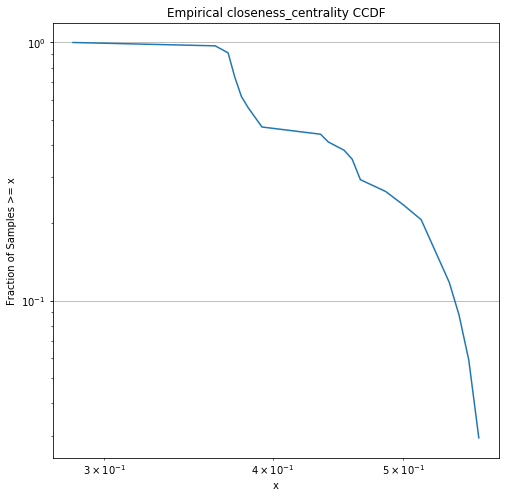

In [112]:
empiricalCCDF("closeness_centrality", "karateData",close_cent)

In [110]:
page_rank = list(nx.pagerank(G3).values())

In [111]:
dataKarate, dataKarateUltilHere6 = createTableData(dataKarate, 5, page_rank,"Page Rank", "No")

┌────────────────────────┬─────────┬─────────┬─────────┬─────────┬────────────────────┬─────────┐
│ Metric                 │ Max     │ Min     │ Average │ Median  │ Standard Deviation │ Sampled │
╞════════════════════════╪═════════╪═════════╪═════════╪═════════╪════════════════════╪═════════╡
│ Degree                 │ 17      │ 1       │ 4.58824 │ 3.0     │ 3.82036            │ No      │
├────────────────────────┼─────────┼─────────┼─────────┼─────────┼────────────────────┼─────────┤
│ Distance               │ 5.0     │ 1.0     │ 2.36915 │ 2.0     │ 0.90077            │ No      │
├────────────────────────┼─────────┼─────────┼─────────┼─────────┼────────────────────┼─────────┤
│ Degree Centrality      │ 0.51515 │ 0.0303  │ 0.13904 │ 0.09091 │ 0.11577            │ No      │
├────────────────────────┼─────────┼─────────┼─────────┼─────────┼────────────────────┼─────────┤
│ Betweenness Centrality │ 0.43764 │ 0.0     │ 0.04401 │ 0.00257 │ 0.09254            │ No      │
├───────────────────

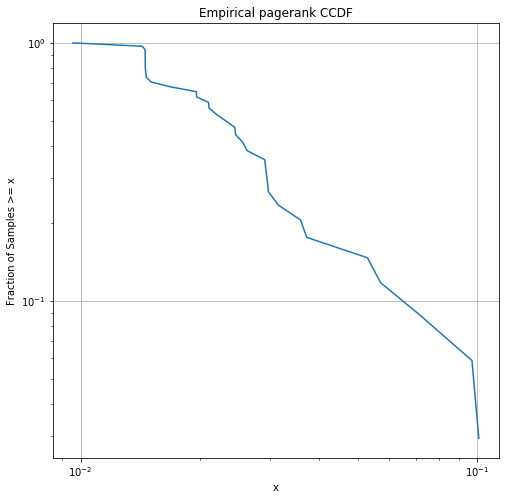

In [113]:
empiricalCCDF("pagerank", "karateData",page_rank)

Nodes sorted by degree centrality:
(33, 0.5151515151515151)
(0, 0.48484848484848486)
(32, 0.36363636363636365)
Nodes sorted by betweenness centrality:
(0, 0.43763528138528146)
(33, 0.30407497594997596)
(32, 0.145247113997114)
Nodes sorted by closeness centrality:
(0, 0.5689655172413793)
(2, 0.559322033898305)
(33, 0.55)
Nodes sorted by eigenvector centrality:
(33, 0.373371213013235)
(0, 0.3554834941851943)
(2, 0.31718938996844476)
Nodes sorted by page rank centrality:
(33, 0.1009179167487121)
(0, 0.09700181758983709)
(32, 0.07169213006588289)


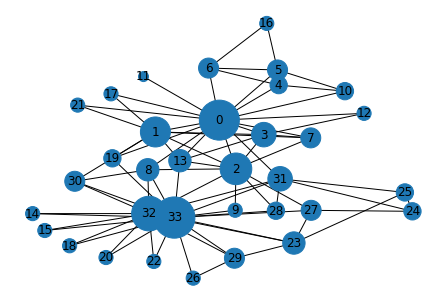

In [216]:
print_nodes_by_degree_cent(G3,3)
print_nodes_by_betweenness_cent(G3,3)
print_nodes_by_closeness_cent(G3,3)
print_nodes_by_eigenvector_cent(G3,3)
print_nodes_by_page_rank_cent(G3,3)
draw_node_size_by_deg(G3, 100, with_labels=True)

In [124]:
G4 = nx.read_gml(adjnoun)

In [125]:
data = [["NetworkX","Directed",  G4.number_of_nodes(), G4.number_of_edges()]]
print(tt.to_string(data, header=[ "Provider", "Type", "Nodes", "Edges"]))

┌──────────┬──────────┬───────┬───────┐
│ Provider │ Type     │ Nodes │ Edges │
╞══════════╪══════════╪═══════╪═══════╡
│ NetworkX │ Directed │ 112   │ 425   │
└──────────┴──────────┴───────┴───────┘


### - Degree

In [126]:
df_stats = pd.DataFrame(nx.degree(G3))
df_stats.columns = ['Node', 'Degree']

In [127]:
dataWords = []
dataWords, dataWordsUltilHere1 = createTableData(dataWords, 5, df_stats['Degree'],"Degree", "No")

┌────────┬─────┬─────┬─────────┬────────┬────────────────────┬─────────┐
│ Metric │ Max │ Min │ Average │ Median │ Standard Deviation │ Sampled │
╞════════╪═════╪═════╪═════════╪════════╪════════════════════╪═════════╡
│ Degree │ 17  │ 1   │ 4.58824 │ 3.0    │ 3.82036            │ No      │
└────────┴─────┴─────┴─────────┴────────┴────────────────────┴─────────┘


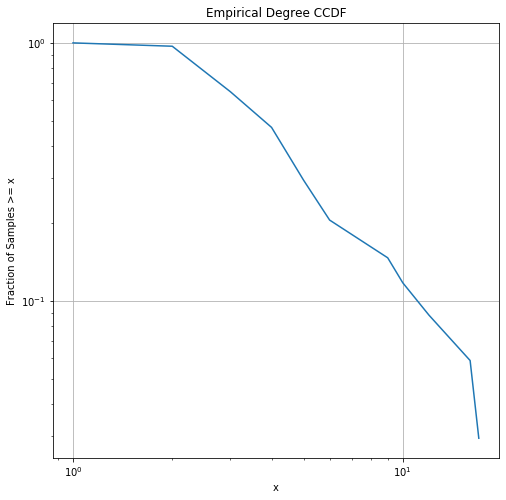

In [167]:
empiricalCCDF("Degree", "closeWords",df_stats['Degree'])

### - Distance

In [165]:
%%time
dist_word = distanceMesureList(G4, 112)
dataWords, dataWordsUltilHere2 = createTableData(dataWords, 5, dist_word, "Distance", "No")

┌──────────┬─────┬─────┬─────────┬────────┬────────────────────┬─────────┐
│ Metric   │ Max │ Min │ Average │ Median │ Standard Deviation │ Sampled │
╞══════════╪═════╪═════╪═════════╪════════╪════════════════════╪═════════╡
│ Degree   │ 17  │ 1   │ 4.58824 │ 3.0    │ 3.82036            │ No      │
├──────────┼─────┼─────┼─────────┼────────┼────────────────────┼─────────┤
│ Distance │ 5.0 │ 1.0 │ 2.54303 │ 3.0    │ 0.78079            │ No      │
└──────────┴─────┴─────┴─────────┴────────┴────────────────────┴─────────┘
CPU times: user 136 ms, sys: 3.76 ms, total: 140 ms
Wall time: 139 ms


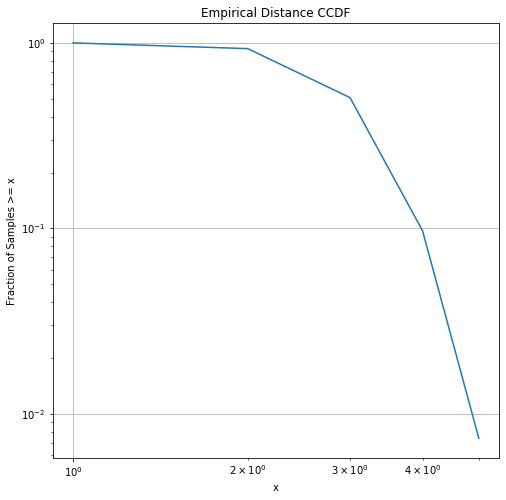

In [169]:
empiricalCCDF("Distance", "closeWords",dist_word)

In [178]:
def calculateMetrics(g):
    degree_centrality = np.array(list(nx.degree_centrality(g).values()))
    bet_cent = np.array(list(nx.betweenness_centrality(g).values()))
    close_cent = np.array(list(nx.closeness_centrality(g).values()))
    page_rank = np.array(list(nx.pagerank(g).values()))
    return degree_centrality, bet_cent, close_cent, page_rank           
                
degree_centrality_words, bet_cent_words, close_cent_words, page_rank_words = calculateMetrics(G4)

In [179]:
dataWords, dataWordsUltilHere3 = createTableData(dataWords, 5, degree_centrality_words,"Degree Centrality", "No")

┌───────────────────┬─────────┬─────────┬─────────┬─────────┬────────────────────┬─────────┐
│ Metric            │ Max     │ Min     │ Average │ Median  │ Standard Deviation │ Sampled │
╞═══════════════════╪═════════╪═════════╪═════════╪═════════╪════════════════════╪═════════╡
│ Degree            │ 17      │ 1       │ 4.58824 │ 3.0     │ 3.82036            │ No      │
├───────────────────┼─────────┼─────────┼─────────┼─────────┼────────────────────┼─────────┤
│ Distance          │ 5.0     │ 1.0     │ 2.54303 │ 3.0     │ 0.78079            │ No      │
├───────────────────┼─────────┼─────────┼─────────┼─────────┼────────────────────┼─────────┤
│ Degree Centrality │ 0.44144 │ 0.00901 │ 0.06837 │ 0.05405 │ 0.06172            │ No      │
└───────────────────┴─────────┴─────────┴─────────┴─────────┴────────────────────┴─────────┘


In [180]:
dataWords, dataWordsUltilHere4 = createTableData(dataWords, 5, bet_cent_words,"Betweenness Centrality", "No")

┌────────────────────────┬─────────┬─────────┬─────────┬─────────┬────────────────────┬─────────┐
│ Metric                 │ Max     │ Min     │ Average │ Median  │ Standard Deviation │ Sampled │
╞════════════════════════╪═════════╪═════════╪═════════╪═════════╪════════════════════╪═════════╡
│ Degree                 │ 17      │ 1       │ 4.58824 │ 3.0     │ 3.82036            │ No      │
├────────────────────────┼─────────┼─────────┼─────────┼─────────┼────────────────────┼─────────┤
│ Distance               │ 5.0     │ 1.0     │ 2.54303 │ 3.0     │ 0.78079            │ No      │
├────────────────────────┼─────────┼─────────┼─────────┼─────────┼────────────────────┼─────────┤
│ Degree Centrality      │ 0.44144 │ 0.00901 │ 0.06837 │ 0.05405 │ 0.06172            │ No      │
├────────────────────────┼─────────┼─────────┼─────────┼─────────┼────────────────────┼─────────┤
│ Betweenness Centrality │ 0.24469 │ 0.0     │ 0.01396 │ 0.00472 │ 0.02971            │ No      │
└───────────────────

In [181]:
dataWords, dataWordsUltilHere5 = createTableData(dataWords, 5, close_cent_words,"Closeness Centrality", "No")

┌────────────────────────┬─────────┬─────────┬─────────┬─────────┬────────────────────┬─────────┐
│ Metric                 │ Max     │ Min     │ Average │ Median  │ Standard Deviation │ Sampled │
╞════════════════════════╪═════════╪═════════╪═════════╪═════════╪════════════════════╪═════════╡
│ Degree                 │ 17      │ 1       │ 4.58824 │ 3.0     │ 3.82036            │ No      │
├────────────────────────┼─────────┼─────────┼─────────┼─────────┼────────────────────┼─────────┤
│ Distance               │ 5.0     │ 1.0     │ 2.54303 │ 3.0     │ 0.78079            │ No      │
├────────────────────────┼─────────┼─────────┼─────────┼─────────┼────────────────────┼─────────┤
│ Degree Centrality      │ 0.44144 │ 0.00901 │ 0.06837 │ 0.05405 │ 0.06172            │ No      │
├────────────────────────┼─────────┼─────────┼─────────┼─────────┼────────────────────┼─────────┤
│ Betweenness Centrality │ 0.24469 │ 0.0     │ 0.01396 │ 0.00472 │ 0.02971            │ No      │
├───────────────────

In [182]:
dataWords, dataWordsUltilHere6 = createTableData(dataWords, 5, page_rank_words,"Page Rank", "No")

┌────────────────────────┬─────────┬─────────┬─────────┬─────────┬────────────────────┬─────────┐
│ Metric                 │ Max     │ Min     │ Average │ Median  │ Standard Deviation │ Sampled │
╞════════════════════════╪═════════╪═════════╪═════════╪═════════╪════════════════════╪═════════╡
│ Degree                 │ 17      │ 1       │ 4.58824 │ 3.0     │ 3.82036            │ No      │
├────────────────────────┼─────────┼─────────┼─────────┼─────────┼────────────────────┼─────────┤
│ Distance               │ 5.0     │ 1.0     │ 2.54303 │ 3.0     │ 0.78079            │ No      │
├────────────────────────┼─────────┼─────────┼─────────┼─────────┼────────────────────┼─────────┤
│ Degree Centrality      │ 0.44144 │ 0.00901 │ 0.06837 │ 0.05405 │ 0.06172            │ No      │
├────────────────────────┼─────────┼─────────┼─────────┼─────────┼────────────────────┼─────────┤
│ Betweenness Centrality │ 0.24469 │ 0.0     │ 0.01396 │ 0.00472 │ 0.02971            │ No      │
├───────────────────

Nodes sorted by degree centrality:
('little', 0.44144144144144143)
('old', 0.2972972972972973)
('other', 0.25225225225225223)
Nodes sorted by betweenness centrality:
('little', 0.24468528792139316)
('old', 0.12867269543314205)
('other', 0.09745558823854304)
Nodes sorted by closeness centrality:
('little', 0.6166666666666667)
('old', 0.5467980295566502)
('good', 0.5260663507109005)
Nodes sorted by eigenvector centrality:
('little', 0.4009759281963071)
('old', 0.2832727130880712)
('good', 0.24214273052290808)
Nodes sorted by page rank centrality:
('little', 0.050505301233337296)
('old', 0.035711695262686825)
('other', 0.02940250880002148)


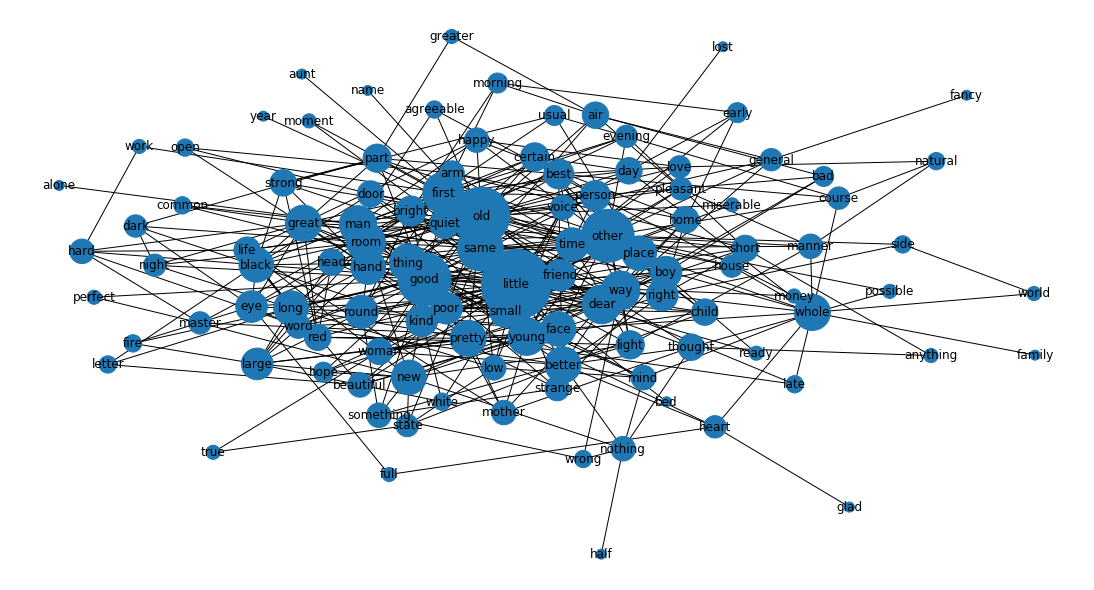

In [219]:
print_nodes_by_degree_cent(G4,3)
print_nodes_by_betweenness_cent(G4,3)
print_nodes_by_closeness_cent(G4,3)
print_nodes_by_eigenvector_cent(G4,3)
print_nodes_by_page_rank_cent(G4,3)
draw_node_size_by_deg(G4, 100, with_labels=True, hight = 15, widith = 8)